# Tutorial 0: Damped pendulum
## Input/Output and regression

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0,$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$$\boxed{y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}},$$ 

where $A$ is  the inital oscillation amplitude, $\beta=b/2m$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. 

https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/damped_pendulum.csv

a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

e) Make a plot showing the empirical data and the best-fit model obtained from your regression.



##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator

### a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Inspection of the data

In [2]:
# Provide the path
path = './Data/damped_pendulum.csv'

# Get it!
pendulum_dataset = pd.read_csv(path, sep = ',')

# Type
print(type(pendulum_dataset))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# Visualize it
pendulum_dataset

,time,displacement
0,0.000000,1.000000e+00
1,1.003345,5.523100e-01
2,2.006689,-3.387563e-01
3,3.010034,-8.466000e-01
4,4.013378,-5.608279e-01
...,...,...
195,195.652160,4.728779e-05
196,196.655520,-5.399856e-07
197,197.658860,-4.332556e-05
198,198.662200,-4.389308e-05


#### Solving it without a function

In [4]:
# Get the arrays
time_array = np.array(pendulum_dataset['time'])
disp_array = np.array(pendulum_dataset['displacement'])

# Shape
print(time_array.shape, disp_array.shape)

(200,) (200,)


The problem has been solved, but not using a function. Let's combine this process into a function!

#### Function

In [5]:
def io_function(filename):
    """
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ',')

    # Get data into arrays:
    time = np.array(df['time'])
    deltas = np.array(df['displacement'])

    return time, deltas

### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [6]:
# Give the path
filename = './Data/damped_pendulum.csv'

# Get the arrays using the function
time_array, disp_array = io_function(filename)

In [7]:
# Verify the array
print(time_array.shape, disp_array.shape)

(200,) (200,)


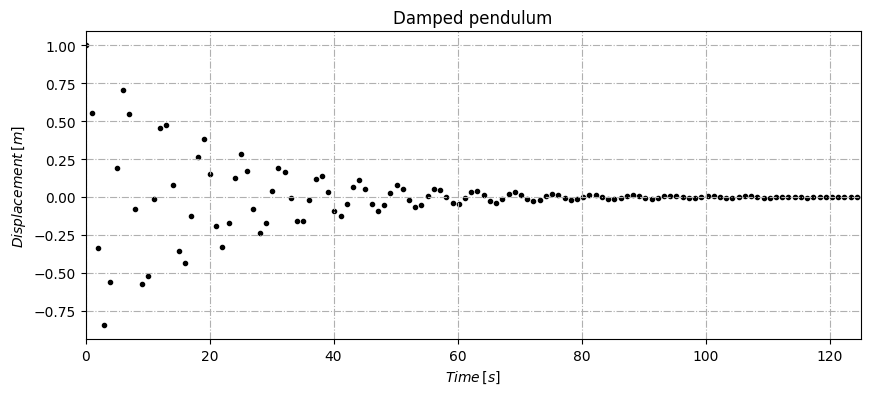

In [8]:
# Plotting
plt.figure(figsize=(10,4))

plt.scatter(time_array, disp_array, marker=".", color = "k")

plt.title('Damped pendulum')
plt.xlabel(r"$Time\, [s]$")
plt.ylabel(r"$Displacement\, [m]$")
plt.grid(linestyle = "-.")

plt.xlim(0, 125)
plt.show()
plt.close()

### c) Use a physically-motivated model, and constrain its free parameters by carrying out a regression.

The model we're going to use is

$$ y(t) = Ae^{-\beta \, t}\cos(\omega \, t).
$$

In [9]:
# Model
def physical_model(times, A, beta, omega):
    """
    """
    return A*np.exp(-beta*times)*np.cos(omega*times)

In [10]:
# Import the library
import scipy.optimize as opt

In [11]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(physical_model, time_array, disp_array)

In [12]:
# Get the regression curve:
fit_array = physical_model(time_array, *coef)

### d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

#### Uncertainties

In [13]:
# Let's calculate them
uncertainties = np.sqrt(np.diag(cova))

# Print them
print(uncertainties)

[0.00321046 0.00023848 0.00017709]


#### Immediate ones

In [14]:
# Function to report
def reporting(coef, cova, coef_names):
    """
    """
    # Uncertainties
    uncertainties = np.sqrt(np.diag(cova))

    # And run the loop
    for i in range(len(coef)):
        print(f'{coef_names[i]} = {coef[i]:.8} +/- {uncertainties[i]:.5}.')

In [15]:
reporting(coef, cova, ('A', 'beta', 'omega'))

A = 1.0031306 +/- 0.0032105.
beta = 0.050123868 +/- 0.00023848.
omega = 0.9962379 +/- 0.00017709.


In [17]:
# A, beta and omega are given directly
A, beta, omega = coef[0], coef[1], coef[2]

# Then
#print(f'Simply, \n A     = {A_coef} +/- {uncertainties[0]}, \n beta  = {beta} +/- {uncertainties[1]}, \n omega = {omega} +/- {uncertainties[2]}.')

#### Require some more steps

Since $\beta = b/2m$ and $m = 1 \text{kg}$,

In [22]:
# then
b = beta*2
b_delta = uncertainties[1]*2

print(f'b = {b} +/- {b_delta}.')

b = 0.10024773519459568 +/- 0.0004769618342400325.


While $k$ should be given by
$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}} \implies k = m\left(\omega² + \frac{b²}{4m²}\right),$$
and it's uncertainty by using propagation is
$$ \Delta_{k} = 2 \sqrt{\omega²\,\Delta_{\omega}²+b²\,\Delta_b²}.$$

In [25]:
# So that
k = omega**2+b**2/4

# and
k_delta = 2*np.sqrt(omega**2*uncertainties[-1]**2+b**2*b_delta**2)

# Report
print(f'k = {k} +/- {k_delta}')

k = 0.9950023599964671 +/- 0.00036558565329013404


In [20]:
# Increase the resolution
new_time_array = np.linspace(time_array[0], time_array[-1], 2200)

# Use the function
new_fit_array = physical_model(new_time_array, *coef)

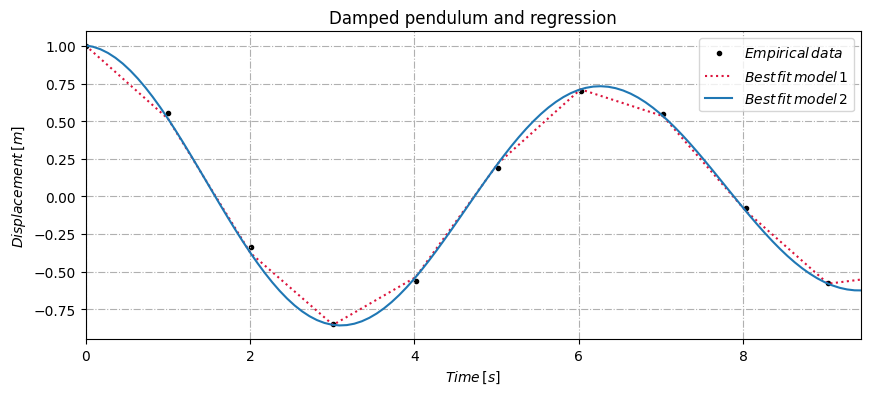

In [21]:
# Plotting:
plt.figure(figsize=(10,4))

plt.scatter(time_array, disp_array, marker=".", color = "k", label = r"$Empirical\, data$")
plt.plot(time_array, fit_array, linestyle = ":", color = "crimson",\
        label = r"$Best\, fit\, model\, 1$")
plt.plot(new_time_array, new_fit_array, linestyle = "-", color = "C10",\
        label = r"$Best\, fit\, model\, 2$")

plt.title('Damped pendulum and regression')
plt.xlabel(r"$Time\, [s]$")
plt.ylabel(r"$Displacement\, [m]$")

plt.legend()

plt.grid(linestyle = "-.")
plt.xlim(0, 3*np.pi)
plt.show()
plt.close()